# Machine Learning Beispiel aus Kaggle

## Spielwiese

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv(r"C:\KaggleData\Mall_Customers.csv")

In [14]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [15]:
data.shape

(200, 5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
X = data.iloc[:,[3,4]].values

## K-Means Clustering
## The Elbow Method
- Using K-Means to iterate from 1 to 11 clusters and plotting a Elbow plot.
- Deciding optimal number of clusters to be used

In [20]:
from sklearn.cluster import KMeans
wcss = []

In [21]:
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\kitch\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


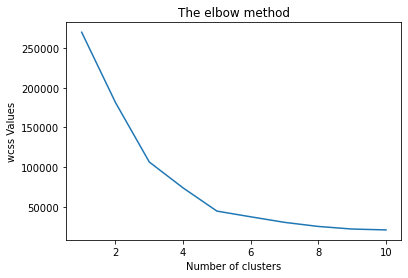

In [22]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss Values')
plt.show()

## Training a model
- Initializing the K-Means Model with selected optimal Numbers of cluster (5)


In [31]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [34]:
y_kmeans = kmeansmodel.fit_predict(X)

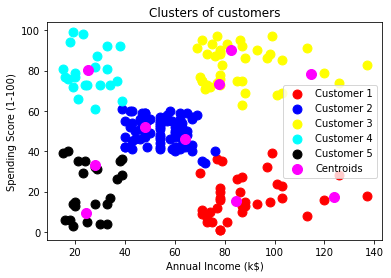

In [35]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=80, c="red", label="Customer 1")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=80, c="blue", label="Customer 2")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=80, c="yellow", label="Customer 3")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=80, c="cyan", label="Customer 4")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=80, c="black", label="Customer 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="magenta", label="Centroids")
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()